# **mount google drive**

In [0]:
from google.colab import drive
drive.mount('/content/drive')

# download, unzip dataset, and move the folder to drive
one time use

In [0]:
!wget 'https://storage.googleapis.com/kaggle-competitions-data/kaggle/15062/545987/all-dogs.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1564746990&Signature=VciHyKyGeXf3zGmr7Vh1OSE3gEOq1HYtyIyV6MNBwySH6F5EKJCZRQKS1TtjyUjEAOT%2BKyrhGTs%2BME%2FWLcrMuAK0mMRuXwvCWai1%2FeTzoV4B3wsrqJY5dg%2BKXLQa5drF9Iiyy1FIf%2FJnZnwEpQd5IIro0rLv3m9dKTdNR7GV%2FT1o0hbtVPcQxDq35%2FhrV5FAJ8%2BKZdjISgEMaSA2ZJtjIRFr5ugJrtItQwrIDKR6%2B6ShRU7WwyLrEWjzHL%2BZ3cEnwauQWo4SuVPzL6wbD6Cn0OqRFKg5AkfvyEqJAjOuSo%2BriqlwT6AIeX%2F51l%2BVmRkLSNlCMU5hvBvSkTMNHhieHw%3D%3D'

In [0]:
!unzip '/content/all-dogs.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1564746990&Signature=VciHyKyGeXf3zGmr7Vh1OSE3gEOq1HYtyIyV6MNBwySH6F5EKJCZRQKS1TtjyUjEAOT+KyrhGTs+ME%2FWLcrMuAK0mMRuXwvCWai1%2FeTzoV4B3wsrqJY5dg+KXLQa5drF'

In [0]:
import shutil
shutil.move("/content/all-dogs", "/content/drive/My Drive/DL-workspace/keras-dcgan")

'/content/drive/My Drive/DL-workspace/keras-dcgan/all-dogs'

# resize images and move them to drive
unused

In [0]:
import glob
from PIL import Image, ImageOps
import os


class ImageProcessor:

    def __init__(self, img_size):
        self.img_size = img_size

    def resize_imgs(self, path):
        for i, img_path in enumerate(os.listdir(path)):
            print(i, img_path)
            img = Image.open(path + img_path)
            img = ImageOps.fit(img, (self.img_size[0], self.img_size[1]), Image.ANTIALIAS)
            name = img_path.split("\\")[-1].split('.')[0]
            if not os.path.exists(f"/content/drive/My Drive/DL-workspace/keras-dcgan/resized_{self.img_size[0]}_{self.img_size[1]}"):
                os.makedirs(f"/content/drive/My Drive/DL-workspace/keras-dcgan/resized_{self.img_size[0]}_{self.img_size[1]}")
            img.save(f"/content/drive/My Drive/DL-workspace/keras-dcgan/resized_{self.img_size[0]}_{self.img_size[1]}/{name}.png")


imgprocessor = ImageProcessor((64, 64))
imgprocessor.resize_imgs("/content/drive/My Drive/DL-workspace/keras-dcgan/all-dogs/")

In [0]:
import shutil
shutil.move("/content/resized_64_64", "/content/drive/My Drive/DL-workspace/keras-dcgan")

'/content/drive/My Drive/DL-workspace/keras-dcgan/resized_64_64'

# Crop, resize images and move them to drive
one time use

In [0]:
!wget 'https://storage.googleapis.com/kaggle-competitions-data/kaggle/15062/545987/Annotation.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1564848966&Signature=A39cvoG0smfKYb17CxXIiHZbCqtAMd8E%2FQLtHYAyk%2F7EY1z9JvIWs3MfMKLmbPk1QwHVQ0e8nuT2qH4ZReC9y0Zdd%2BFcM%2BDHv8zHHjDe8dS9Sdq2M%2Frqbj2t%2F3pBU7jgxIxkUOae4noglZB8VYf6uE48Buo%2FQJbhdsnRFAyrzjmMZBjhwQ59Gjg6bn%2FawnPzJuKO75S07BC7s0pRV3W9XZ8E%2B292LmGUedbtDR9BUtlUqYikNDrKGe2UcRQLltk9ralnljZ7nnZEqDxwlU4ZCzFavPJbOb9qLV%2Bd%2FJLrsIgt4X4ImlqKvhDoNM6DME92mniOriYzz%2FHMQZzCsRZArg%3D%3D'

In [0]:
!unzip '/content/Annotation.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1564848966&Signature=A39cvoG0smfKYb17CxXIiHZbCqtAMd8E%2FQLtHYAyk%2F7EY1z9JvIWs3MfMKLmbPk1QwHVQ0e8nuT2qH4ZReC9y0Zdd+FcM+DHv8zHHjDe8dS9Sdq2M%2Frqbj2t%2F3'

In [0]:
import shutil
shutil.move("/content/Annotation", "/content/drive/My Drive/DL-workspace/keras-dcgan")

'/content/drive/My Drive/DL-workspace/keras-dcgan'

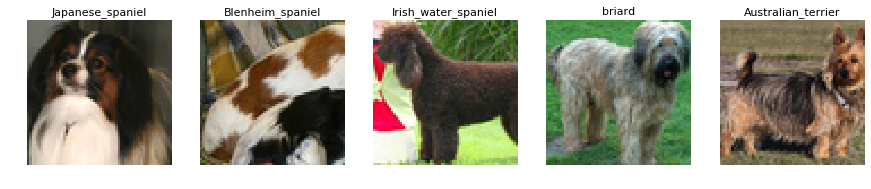

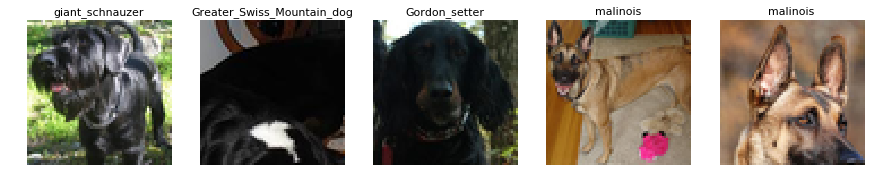

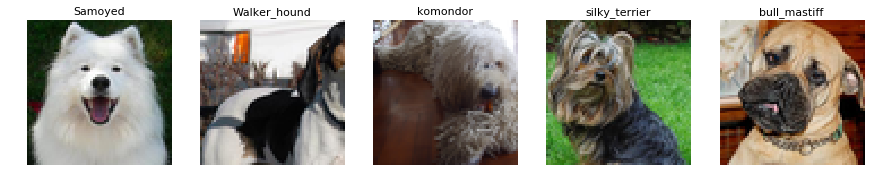

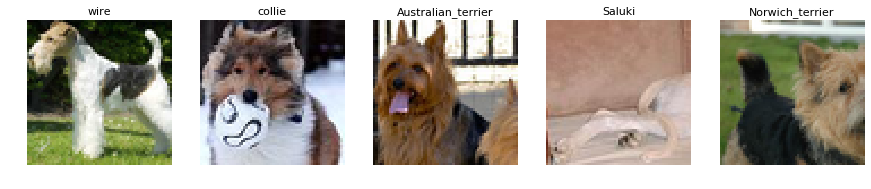

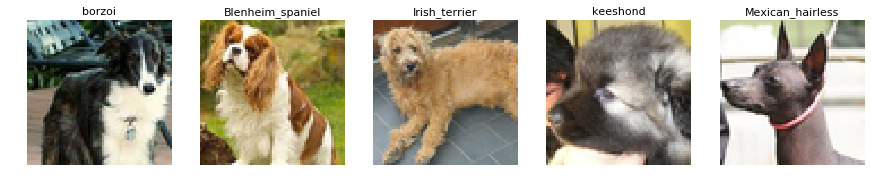

In [0]:
DogsOnly = True

import numpy as np, pandas as pd, os
import xml.etree.ElementTree as ET 
import matplotlib.pyplot as plt, zipfile 
from PIL import Image 
from glob import glob

ROOT = '/content/drive/My Drive/DL-workspace/keras-dcgan/'
IMAGES = os.listdir(ROOT + 'all-dogs/')
breeds = os.listdir(ROOT + 'Annotation/') 

idxIn = 0; namesIn = []
imagesIn = np.zeros((25000,64,64,3))

# CROP WITH BOUNDING BOXES TO GET DOGS ONLY
# https://www.kaggle.com/paulorzp/show-annotations-and-breeds
if DogsOnly:
    for breed in breeds:
        for dog in os.listdir(ROOT+'Annotation/'+breed):
            try: img = Image.open(ROOT+'all-dogs/'+dog+'.jpg') 
            except: continue           
            tree = ET.parse(ROOT+'Annotation/'+breed+'/'+dog)
            root = tree.getroot()
            objects = root.findall('object')
            for o in objects:
                bndbox = o.find('bndbox') 
                xmin = int(bndbox.find('xmin').text)
                ymin = int(bndbox.find('ymin').text)
                xmax = int(bndbox.find('xmax').text)
                ymax = int(bndbox.find('ymax').text)
                w = np.min((xmax - xmin, ymax - ymin))
                img2 = img.crop((xmin, ymin, xmin+w, ymin+w))
                img2 = img2.resize((64,64), Image.ANTIALIAS)
                imagesIn[idxIn,:,:,:] = np.asarray(img2)
                #if idxIn%1000==0: print(idxIn)
                namesIn.append(breed)
                idxIn += 1
                
                if not os.path.exists(f"/content/drive/My Drive/DL-workspace/keras-dcgan/cropped_images"):
                  os.makedirs(f"/content/drive/My Drive/DL-workspace/keras-dcgan/cropped_images")
                img2.save(f"/content/drive/My Drive/DL-workspace/keras-dcgan/cropped_images/{dog}.png")
    idx = np.arange(idxIn)
    np.random.shuffle(idx)
    imagesIn = imagesIn[idx,:,:,:]
    namesIn = np.array(namesIn)[idx]
    
# RANDOMLY CROP FULL IMAGES
else:
    x = np.random.choice(np.arange(20579),10000)
    for k in range(len(x)):
        img = Image.open(ROOT + 'all-dogs/' + IMAGES[x[k]])
        w = img.size[0]
        h = img.size[1]
        sz = np.min((w,h))
        a=0; b=0
        if w<h: b = (h-sz)//2
        else: a = (w-sz)//2
        img = img.crop((0+a, 0+b, sz+a, sz+b))  
        img = img.resize((64,64), Image.ANTIALIAS)   
        imagesIn[idxIn,:,:,:] = np.asarray(img)
        namesIn.append(IMAGES[x[k]])
        if idxIn%1000==0: print(idxIn)
        idxIn += 1
    
# DISPLAY CROPPED IMAGES
x = np.random.randint(0,idxIn,25)
for k in range(5):
    plt.figure(figsize=(15,3))
    for j in range(5):
        plt.subplot(1,5,j+1)
        img = Image.fromarray( imagesIn[x[k*5+j],:,:,:].astype('uint8') )
        plt.axis('off')
        if not DogsOnly: plt.title(namesIn[x[k*5+j]],fontsize=11)
        else: plt.title(namesIn[x[k*5+j]].split('-')[1],fontsize=11)
        plt.imshow(img)
    plt.show()

# run dcgan
training step

In [0]:
!python '/content/drive/My Drive/DL-workspace/keras-dcgan/dcgan.py' --load_generator '/content/drive/My Drive/DL-workspace/keras-dcgan/output/models/generat.h5' --load_discriminator '/content/drive/My Drive/DL-workspace/keras-dcgan/output/models/discrim.h5' --batch_size 32 --data '/content/drive/My Drive/DL-workspace/keras-dcgan/cropped_images/*.png'  --epochs 100000 --output '/content/drive/My Drive/DL-workspace/keras-dcgan/output'  --image_size 64,64

Using TensorFlow backend.


# generate images
generating step

In [1]:
!python '/content/drive/My Drive/DL-workspace/keras-dcgan/dcgan.py' --load_generator '/content/drive/My Drive/DL-workspace/keras-dcgan/output/models/generat.h5' --load_discriminator '/content/drive/My Drive/DL-workspace/keras-dcgan/output/models/discrim.h5'  --sample 10000 --batch_size 32 --data '/content/drive/My Drive/DL-workspace/keras-dcgan/cropped_images/*.png'  --epochs 100000 --output '/content/drive/My Drive/DL-workspace/keras-dcgan/output'  --image_size 64,64

python3: can't open file '/content/drive/My Drive/DL-workspace/keras-dcgan/dcgan.py': [Errno 2] No such file or directory
